<a href="https://colab.research.google.com/github/Onkar-TAE/bike-sharing-demand-prediction-analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


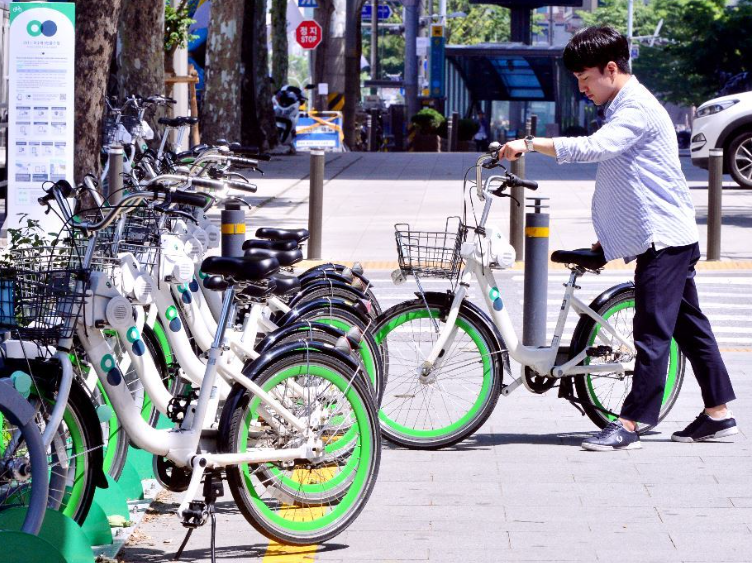

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#  CSV file location path
file_path = '/content/drive/MyDrive/Alma Better-  Data Science Course/Capstone Project/2. ML Capstone Project - Regression Analysis/Data & Resources/SeoulBikeData.csv'

# Read CSV file.
df = pd.read_csv(file_path,encoding = "latin")

#**Data Exploration and Data Cleaning**

In [19]:
#  To check shape of dataframe

df.shape

(8760, 14)

In [20]:
#  To check all the columns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
# Renaming Columns. 

df.rename(columns={'Rented Bike Count': 'Bike_Count','Temperature(°C)':'Temp','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_pt_temp','Solar Radiation (MJ/m2)':'Solar_Rad', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall','Functioning Day':'Function_Day',}, inplace=True)

In [22]:
# To check 1st five rows
df.head()

,Date,Bike_Count,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_pt_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Function_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [23]:
# To check last five rows
df.tail()

,Date,Bike_Count,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_pt_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Function_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [25]:
#  To check the info of dataset to know the data types of variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8760 non-null   object 
 1   Bike_Count    8760 non-null   int64  
 2   Hour          8760 non-null   int64  
 3   Temp          8760 non-null   float64
 4   Humidity      8760 non-null   int64  
 5   Wind_speed    8760 non-null   float64
 6   Visibility    8760 non-null   int64  
 7   Dew_pt_temp   8760 non-null   float64
 8   Solar_Rad     8760 non-null   float64
 9   Rainfall      8760 non-null   float64
 10  Snowfall      8760 non-null   float64
 11  Seasons       8760 non-null   object 
 12  Holiday       8760 non-null   object 
 13  Function_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


#Observations
1 

In [24]:
# To Check the Summary of Bike data to egt mean,max,25%,50%,75% etc

df.describe()

,Bike_Count,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_pt_temp,Solar_Rad,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [26]:
# To Check for Null values 
df.isnull().sum()

Date            0
Bike_Count      0
Hour            0
Temp            0
Humidity        0
Wind_speed      0
Visibility      0
Dew_pt_temp     0
Solar_Rad       0
Rainfall        0
Snowfall        0
Seasons         0
Holiday         0
Function_Day    0
dtype: int64

In [27]:
# Checking Duplicates
print(len(df[df.duplicated()]))

0
